In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_excel("data preparataion\Final_Capstone_Analytical_Dataset.xlsx")

In [72]:

pd.set_option("display.Max_columns", None)
df.head()

,state,literacy_rate,total_population,urban_population,rural_population,urbanisation,urban_aegr,annual_rate_of_change,per_capita_nsdpconstant_prices,per_capita_nsdpcurrent_prices,scb_offices,scb_credit,rrb_credit,agri_credit,industry_credit,cd_rrb,cd_scb_sanction,cd_scb_utilisation,scb_deposits,rrb_deposits,rrb_branches,personal_loans,scb_branches_per_lakh,rrb_branches_per_lakh_rural,scb_deposit_per_capita,scb_credit_per_capita,rrb_credit_per_capita,cd_gap,cd_scb_category,cd_rrb_category,agri_share,industry_share,personal_loan_share,credit_concentration,scb_branches_per_lakh_z,scb_deposit_per_capita_z,scb_credit_per_capita_z,inclusion_index,state_type
0,Maharashtra,82.34,112374,50818,61556,45.2,2.1,2.4,115058,132836,11203,1821186,4936,71834,740632,69.3,89.8,81.3,2028845,7117,692,181292,9969.387937,1124.179609,18.054399,16.206471,0.080187,8.5,Balanced CD,Balanced CD,0.039444,0.406676,0.099546,0.406676,-0.270500,3.868298,3.815854,2.471218,High Income – High Inclusion
1,Punjab,75.84,27743,10399,17344,37.5,2.3,2.6,95807,108970,5547,182003,3689,49981,66483,82.3,79.1,81.3,230021,4481,332,26670,19994.232779,1914.206642,8.291137,6.560322,0.212696,-2.2,Balanced CD,Balanced CD,0.274616,0.365285,0.146536,0.365285,2.074613,0.834329,0.905672,1.271538,High Income – High Inclusion
2,Kerala,94.00,33406,15935,17471,47.7,6.6,9.3,112444,135537,5858,190557,8891,40893,28633,115.6,67.7,67.8,281593,7693,536,66256,17535.772017,3067.941160,8.429414,5.704275,0.508900,-0.1,Balanced CD,High CD,0.214597,0.150260,0.347696,0.347696,1.499505,0.877299,0.647408,1.008071,High Income – High Inclusion
3,Puducherry,85.85,1248,853,395,68.3,2.7,3.1,117102,146921,205,7314,302,1603,1262,109.1,77.9,80.8,9394,277,31,2804,16426.282051,7848.101266,7.527244,5.860577,0.764557,-2.9,Balanced CD,High CD,0.219169,0.172546,0.383374,0.383374,1.239962,0.596946,0.694564,0.843824,High Income – High Inclusion
4,Karnataka,75.37,61095,23626,37469,38.7,2.7,3.2,105697,130024,8625,381438,18159,73429,140750,84.5,71.0,76.5,536909,21489,1510,99344,14117.358213,4029.998132,8.788100,6.243359,0.484641,-5.5,Balanced CD,Balanced CD,0.192506,0.368998,0.260446,0.368998,0.699835,0.988762,0.810047,0.832881,High Income – High Inclusion


#### Output paths

In [ ]:
TABLE_PATH = "outputs/tables/"
PLOT_PATH = "outputs/plots/"

## Tables

#### Table 1 - Financial Inclusion Ranking

In [91]:
Financial_inclusion_ranking = df[[
    "state",
    "scb_branches_per_lakh",
    "scb_deposit_per_capita",
    "scb_credit_per_capita",
    "inclusion_index"
]].sort_values("inclusion_index", ascending=False)

Financial_inclusion_ranking["rank"] = range(1, len(Financial_inclusion_ranking) + 1)
Financial_inclusion_ranking.to_excel(TABLE_PATH + "Financial_inclusion_ranking.xlsx", index=False)
Financial_inclusion_ranking.head()

,state,scb_branches_per_lakh,scb_deposit_per_capita,scb_credit_per_capita,inclusion_index,rank
0,Maharashtra,9969.387937,18.054399,16.206471,2.471218,1
1,Punjab,19994.232779,8.291137,6.560322,1.271538,2
2,Kerala,17535.772017,8.429414,5.704275,1.008071,3
3,Puducherry,16426.282051,7.527244,5.860577,0.843824,4
4,Karnataka,14117.358213,8.788100,6.243359,0.832881,5


#### Table 2 - CD Ratio & Gap

In [94]:
CD_Ratio_Gap = df[[
    "state",
    "cd_scb_utilisation",
    "cd_scb_sanction",
    "cd_gap",
    "cd_scb_category"
]].sort_values("cd_scb_utilisation")

CD_Ratio_Gap.to_excel(TABLE_PATH + "cd_ratios.xlsx", index=False)

CD_Ratio_Gap.head()

,state,cd_scb_utilisation,cd_scb_sanction,cd_gap,cd_scb_category
14,Arunachal Pradesh,24.8,23.7,-1.1,Low CD
15,Meghalaya,28.6,27.4,-1.2,Low CD
23,Nagaland,32.5,31.0,-1.5,Low CD
17,Tripura,32.5,32.4,-0.1,Low CD
21,Jharkhand,33.0,31.8,-1.2,Low CD


#### Table 3 – Credit Structure

In [95]:
Credit_Structure = df[[
    "state",
    "agri_share",
    "industry_share",
    "personal_loan_share",
    "credit_concentration"
]].sort_values("credit_concentration", ascending=False)

Credit_Structure .to_excel(TABLE_PATH + "credit_structure.xlsx", index=False)
Credit_Structure.head()

,state,agri_share,industry_share,personal_loan_share,credit_concentration
12,Mizoram,0.171525,0.075112,0.604821,0.604821
23,Nagaland,0.107829,0.179222,0.595273,0.595273
9,Gujarat,0.110074,0.590228,0.170303,0.590228
14,Arunachal Pradesh,0.082399,0.108744,0.555493,0.555493
26,Manipur,0.206349,0.102293,0.544974,0.544974


#### Table 4 - State Typology

In [96]:
State_typology = df[[
    "state",
    "per_capita_nsdpconstant_prices",
    "inclusion_index",
    "state_type"
]].sort_values(["state_type", "inclusion_index"], ascending=[True, False])

State_typology.to_excel(TABLE_PATH + "state_typology.xlsx", index=False)
State_typology.head()

,state,per_capita_nsdpconstant_prices,inclusion_index,state_type
0,Maharashtra,115058,2.471218,High Income – High Inclusion
1,Punjab,95807,1.271538,High Income – High Inclusion
2,Kerala,112444,1.008071,High Income – High Inclusion
3,Puducherry,117102,0.843824,High Income – High Inclusion
4,Karnataka,105697,0.832881,High Income – High Inclusion


## Plots

#### Plot 1 - Top & Bottom States by Inclusion

C:\Users\nssod\AppData\Local\Temp\ipykernel_25948\4136896882.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


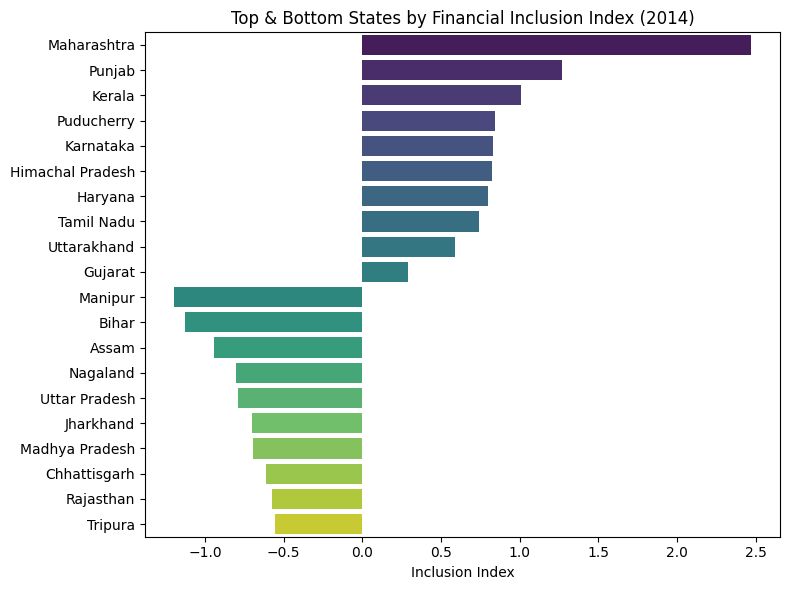

In [ ]:
top_bottom = pd.concat([
    df.sort_values("inclusion_index", ascending=False).head(10),
    df.sort_values("inclusion_index").head(10)
])

plt.figure(figsize=(8,6))
sns.barplot(
    data=top_bottom,
    x="inclusion_index",
    y="state",
    palette="viridis"
)
plt.title("Top & Bottom States by Financial Inclusion Index (2014)")
plt.xlabel("Inclusion Index")
plt.ylabel("")
plt.tight_layout()
plt.savefig(PLOT_PATH + "plot_1_inclusion_ranking.png")
plt.show()

#### Plot 2- Access vs Usage

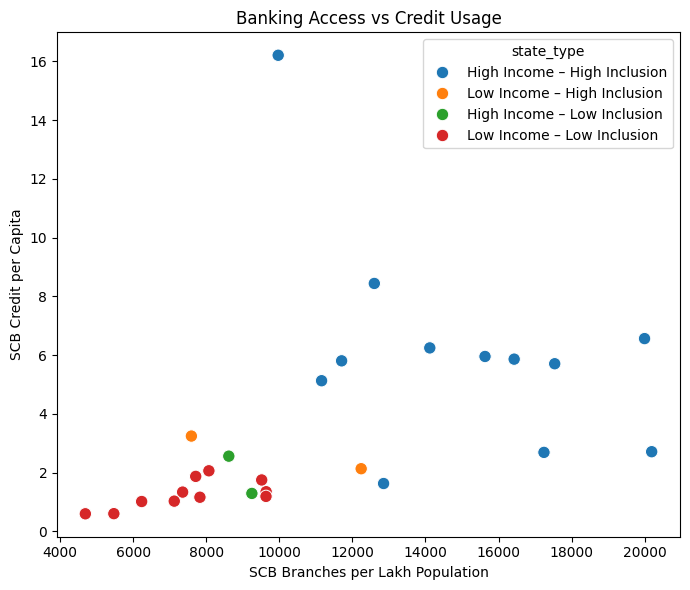

In [83]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="scb_branches_per_lakh",
    y="scb_credit_per_capita",
    hue="state_type",
    s=80
)
plt.title("Banking Access vs Credit Usage")
plt.xlabel("SCB Branches per Lakh Population")
plt.ylabel("SCB Credit per Capita")
plt.tight_layout()
plt.savefig(PLOT_PATH + "plot_2_access_vs_usage.png")
plt.show()

#### Plot 3 - Inclusion Vs CD Ratio

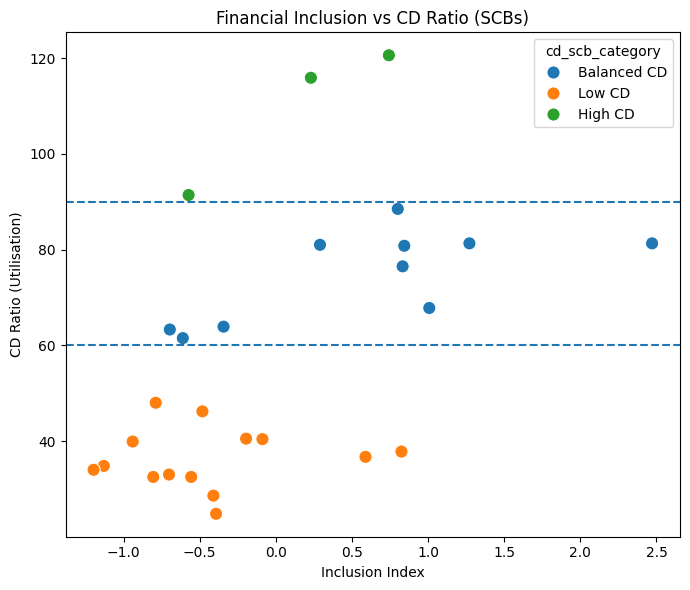

In [84]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="inclusion_index",
    y="cd_scb_utilisation",
    hue="cd_scb_category",
    s=90
)

plt.axhline(60, linestyle="--")
plt.axhline(90, linestyle="--")

plt.title("Financial Inclusion vs CD Ratio (SCBs)")
plt.xlabel("Inclusion Index")
plt.ylabel("CD Ratio (Utilisation)")
plt.tight_layout()
plt.savefig(PLOT_PATH + "plot_3_inclusion_vs_cd.png")
plt.show()


#### Plot 4 - RRB Outreach vs CD Ratio

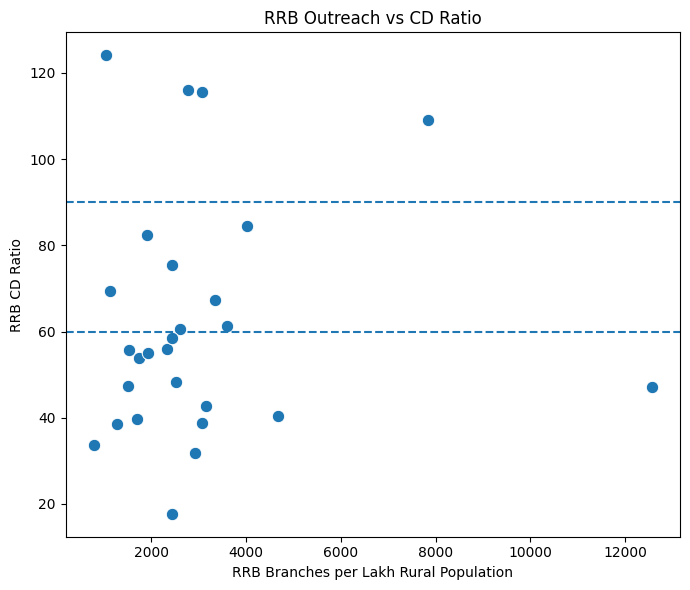

In [85]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="rrb_branches_per_lakh_rural",
    y="cd_rrb",
    s=80
)

plt.axhline(60, linestyle="--")
plt.axhline(90, linestyle="--")

plt.title("RRB Outreach vs CD Ratio")
plt.xlabel("RRB Branches per Lakh Rural Population")
plt.ylabel("RRB CD Ratio")
plt.tight_layout()
plt.savefig(PLOT_PATH + "plot_4_rrb_outreach_cd.png")
plt.show()

#### Plot 5 - Income vs Inclusion

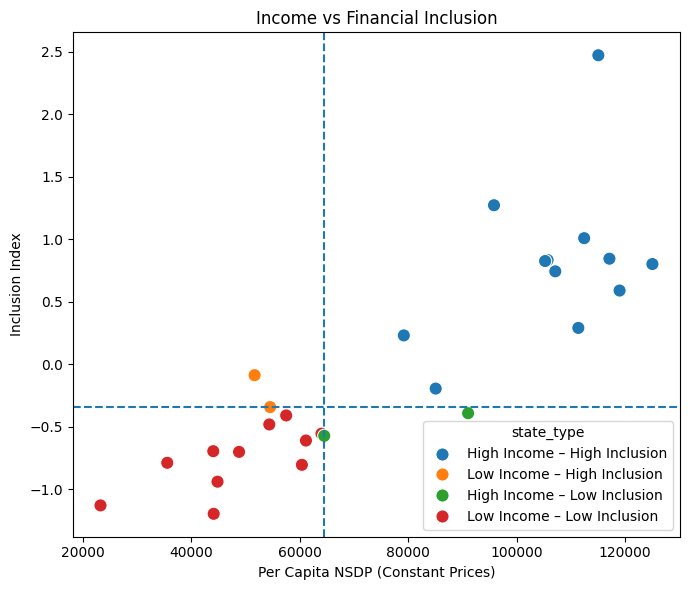

In [88]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="per_capita_nsdpconstant_prices",
    y="inclusion_index",
    hue="state_type",
    s=90
)

plt.axvline(df["per_capita_nsdpconstant_prices"].median(), linestyle="--")
plt.axhline(df["inclusion_index"].median(), linestyle="--")

plt.title("Income vs Financial Inclusion")
plt.xlabel("Per Capita NSDP (Constant Prices)")
plt.ylabel("Inclusion Index")
plt.tight_layout()
plt.savefig(PLOT_PATH + "income_vs_inclusion.png")
plt.show()


#### Plot 6 - Credit Concentration Risk

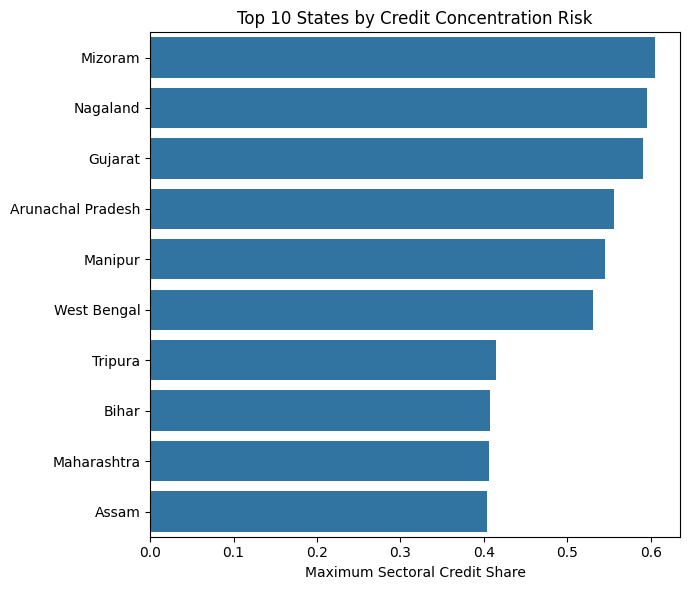

In [89]:
top_conc = df.sort_values("credit_concentration", ascending=False).head(10)

plt.figure(figsize=(7,6))
sns.barplot(
    data=top_conc,
    x="credit_concentration",
    y="state"
)
plt.title("Top 10 States by Credit Concentration Risk")
plt.xlabel("Maximum Sectoral Credit Share")
plt.ylabel("")
plt.tight_layout()
plt.savefig(PLOT_PATH + "credit_concentration.png")
plt.show()

#### Plot 7 - CD Gap (Deposite Leakage)

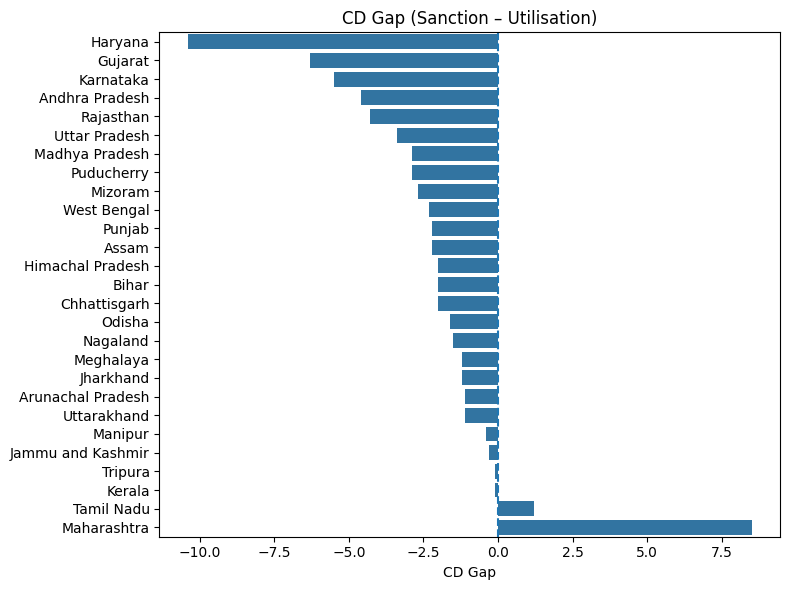

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df.sort_values("cd_gap"),
    x="cd_gap",
    y="state"
)

plt.axvline(0, linestyle="--")
plt.title("CD Gap (Sanction – Utilisation)")
plt.xlabel("CD Gap")
plt.ylabel("")
plt.tight_layout()
plt.savefig(PLOT_PATH + "plot_7_cd_gap.png")
plt.show()

## Results & Interpretation

#### 1. Financial Inclusion across Indian States   


The analysis reveals substantial variation in financial inclusion across Indian states. States ranking higher on the composite inclusion index consistently exhibit higher branch density, deposit mobilisation, and credit penetration. Conversely, a group of states remains persistently low across all three dimensions, indicating structural inclusion deficits rather than temporary shortfalls.

Notably, branch density alone does not ensure financial deepening. Several states with relatively dense banking infrastructure continue to display low credit per capita, suggesting limited translation of access into effective usage.

#### 2. Bank Balance-Sheet Behaviour and CD Ratios

State-wise credit–deposit ratios display pronounced dispersion. A number of states exhibit CD ratios below 60 per cent, reflecting under-utilisation of local deposits, while others show ratios exceeding 90 per cent, indicating relatively aggressive credit deployment.

Differences between CD ratios based on place of sanction and place of utilisation further reveal inter-state credit flows. Negative CD gaps in several states suggest that deposits mobilised locally are deployed elsewhere, whereas positive gaps indicate net inflow of credit.

#### 3. Financial Inclusion and Credit Deployment

The relationship between financial inclusion and bank lending is non-linear. While higher inclusion is generally associated with greater credit penetration, several states demonstrate high inclusion accompanied by moderate or low CD ratios. This pattern points towards conservative lending behaviour or weak credit demand despite adequate banking outreach.

After accounting for income levels, inclusion continues to explain variation in credit outcomes, highlighting the independent role of banking infrastructure and engagement.

#### 4. Credit Structure and Sectoral Concentration

Sectoral analysis shows that credit portfolios differ markedly across states. In several states, agriculture accounts for a dominant share of bank credit, while others are heavily skewed towards industrial or retail lending. States with high credit concentration indices are potentially more vulnerable to sector-specific shocks.

These structural differences underline the importance of contextualising CD ratios and credit growth with underlying credit composition.

#### 5. Development, Inclusion, and Structural Gaps

The state typology based on income and inclusion reveals four distinct groups. While high-income–high-inclusion states represent mature banking ecosystems, the presence of high-income–low-inclusion states indicates structural banking gaps unrelated to economic capacity. Conversely, some low-income states have achieved relatively higher inclusion, reflecting successful outreach efforts.

#### 6. Supervisory and Policy Implications

From a supervisory perspective, states characterised by persistently low CD ratios despite adequate branch presence may warrant closer examination of credit demand and lending practices. States with very high CD ratios combined with concentrated credit exposure may require careful monitoring to assess sustainability. The findings underscore the need for regionally differentiated supervisory and policy responses rather than uniform benchmarks.